<header>
    <h1>Вступительное задание ЛШ DataScience 2017</h1>
  </header>
  <h2>Задание 1. «Творческое»</h2>

Выполнение статистического анализа приложенного датасета о покемонах.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('pokemon.csv')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 8)

<h3>Вводимые данные</h3>

In [2]:
data.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


<h3>Разбиение покемонов по типам </h3>

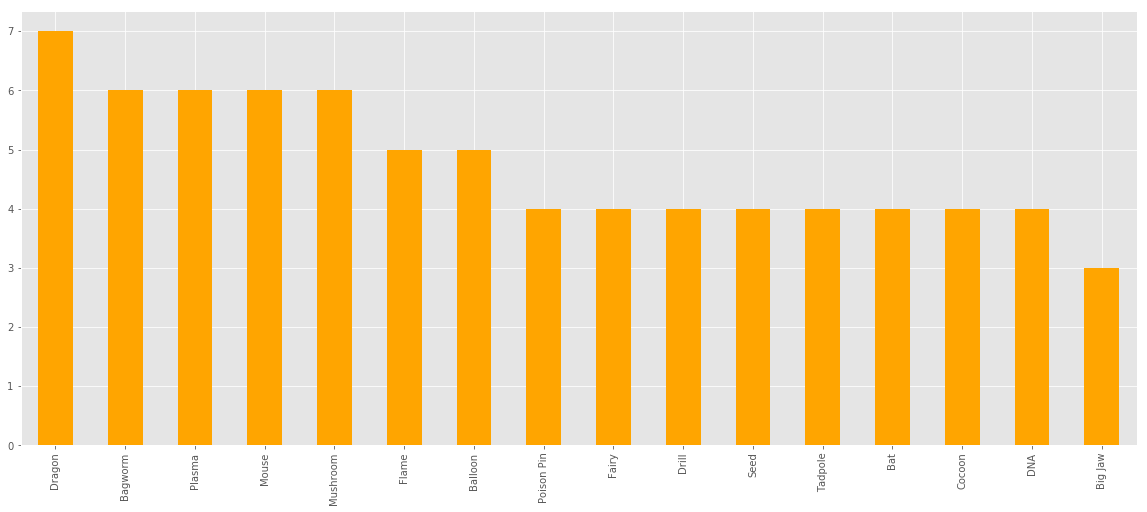

In [3]:
data['species'].value_counts()[:16].plot(kind='bar', color='orange')

<h3>Определение типа распределения покемонов по росту</h3> 

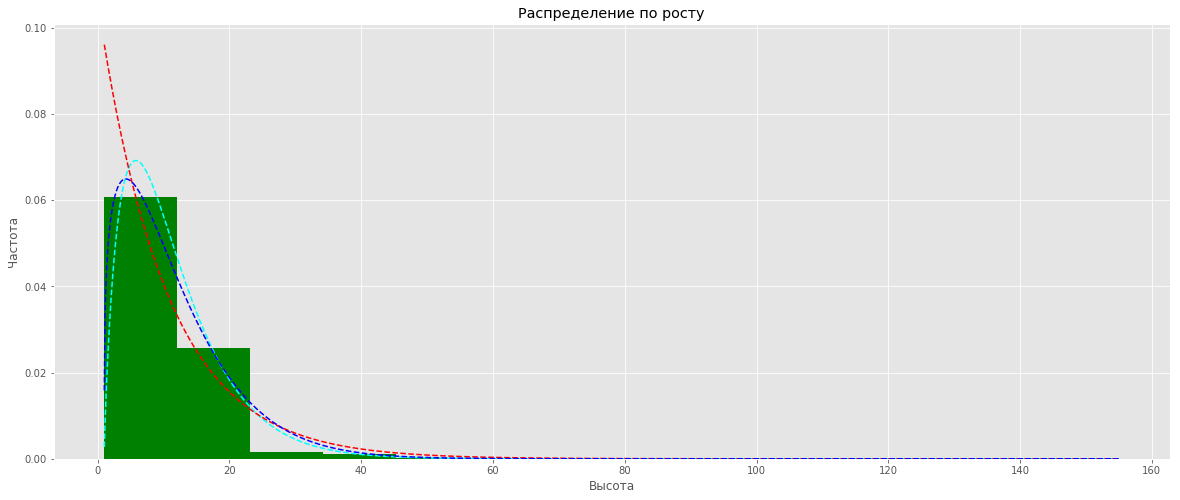

In [4]:
import math
import scipy.stats as ss

#fig, ax = plt.subplots(1, 1)

#from scipy.stats import expon
rate = list(map(int, pd.read_csv('pokemon.csv', usecols=['height'], squeeze=False).values))
#print(len(rate))
df = 23
#print(ss.weibull_min.fit(rate))
loc, scale = ss.expon.fit(rate) 
c, loc1, scale1 = ss.weibull_min.fit(rate)
dff, loc2, scale2 = ss.chi2.fit(rate, df) 
x = np.linspace(np.min(rate), np.max(rate) + 10, len(rate) * 2) # формула Стэджесса
distr_data = ss.expon.pdf(x, loc, scale) #e
distr_data1 = ss.weibull_min.pdf(x, c, loc1, scale1) #Вейбулла
distr_data2 = ss.chi2.pdf(x, dff, loc2, scale2) # х кв -распределение
plt.xlabel('Высота')
plt.ylabel('Частота')
plt.plot(x, distr_data2, 'r--', color = 'Aqua') 
plt.plot(x, distr_data, 'r--', color = 'Red')
plt.plot(x, distr_data1, 'r--', color = 'Blue')
plt.hist(rate, bins=int((max(rate)-min(rate))/(1+3.322*math.log10(len(rate)))),normed=1,color = 'green')  # plt.hist passes it's arguments to np.histogram
plt.title("Распределение по росту")
plt.show()


<p><img src="https://pp.userapi.com/c639617/v639617485/27094/3De1gdAGSHg.jpg" alt="e" align="left"></p>
<p>Экспоненциальное распределение для приведенных данных.</p> 
<p><img src="https://pp.userapi.com/c639617/v639617485/27126/ai8in9X7qEs.jpg" alt="e" align="left"></p>
<p>Распределение хи-квадрат для приведенных данных.</p>
<p><img src="https://pp.userapi.com/c639617/v639617485/2711b/nGcNLOKXs7g.jpg" alt="e" align="left"></p>
<p>Распределение Вейбулла для приведенных данных.</p>


<h3> Оценка коэффициента вариации</h3> 
<p>Полученное значение Vx сравнивается со следующей таблицей и делается вывод, какое распределение лучше подходит:</p>


<tbody><tr><td>Vx &lt;= 0.3</td><td>Нормальный</td></tr><tr><td>0.3 &lt;= Vx &lt; 0.4</td><td>Гамма-распределение</td></tr><tr><td>0.4 &lt;= Vx &lt; 1</td><td>Вейбулла</td></tr><tr><td>Vx = 1</td><td> Экспоненциальный</td></tr></tbody>

In [5]:
mean = np.sum(rate)/len(rate)
print("mean = {0}".format(mean))
S = np.sqrt(np.sum((rate-np.mean(rate))**2)/len(rate)-1)
print("S = {0}".format(S))
Vx = S/mean
print("Vx = {0}".format(Vx)) 

mean = 11.490196078431373
S = 10.488425443666229
Vx = 0.9128151836637844


<p>Оценка коэффициента вариации Vx = 0.913 ближе всего к экспоненциальному значению, значит тип распределения покемонов по росту вероятностно экспоненциальный.<p/>
<p>Помимо коэффициента вариации были также расчитаны среднее значение - mean и стандартное отклонение - S<p/>

<p><h3>Критерий согласия</h3><p/>

<p>Проверка гипотезы о согласии распределения исследуемой совокупности с теоретическими распределениями используя критерий согласия Пирсона<p/>
 

In [ ]:
counts, bins = np.histogram(rate, bins=int((max(rate)-min(rate))/(1+3.322*math.log10(len(rate)))))
#print(counts, bins)
p_observed = np.array(counts, dtype=float)
#print(p_observed)


#weibull
tmp = ss.weibull_min.cdf(bins, c, loc1, scale1)
#print(tmp)
p_expected = []
for idx, p in enumerate(tmp):
    #print(idx, p)
    if idx == len(tmp) - 1:
        break
    p_expected.append(tmp[idx+1] - tmp[idx])
#print(p_expected)
p_expected = len(rate)*np.array(p_expected)
chi_test_value, probability_fit = ss.chisquare(p_observed, np.array(p_expected, dtype=float))
print('Вероятность того, что распределение Вейбулла подходит к полученным данным: {0:f}'.format(probability_fit))

chi_star = np.sum((p_observed-p_expected)**2/p_expected)
print("chi_star = {}".format(chi_star))
conf_interval = 0.95
df = len(bins) - 2 - 1 
chi = ss.weibull_min.ppf(conf_interval, df)  
print("chi = {}".format(chi))

#expon
tmp = ss.expon.cdf(bins, loc, scale)
#print(tmp)
p_expected = []
for idx, p in enumerate(tmp):
    #print(idx, p)
    if idx == len(tmp) - 1:
        break
    p_expected.append(tmp[idx+1] - tmp[idx])
#print(p_expected)
p_expected = len(rate)*np.array(p_expected)
chi_test_value, probability_fit = ss.chisquare(p_observed, np.array(p_expected, dtype=float))
print('Вероятность того, что Экспоненциальное распределение подходит к полученным данным: {0:f}'.format(probability_fit))

#chi2
tmp = ss.chi2.cdf(bins, dff, loc2, scale2)
#print(tmp)
p_expected = []
for idx, p in enumerate(tmp):
    #print(idx, p)
    if idx == len(tmp) - 1:
        break
    p_expected.append(tmp[idx+1] - tmp[idx])
#print(p_expected)
p_expected = len(rate)*np.array(p_expected)
chi_test_value, probability_fit = ss.chisquare(p_observed, np.array(p_expected, dtype=float))
print('Вероятность того, что Распределение хи-квадрат подходит к полученным данным: {0:f}'.format(probability_fit))


Вероятность того, что распределение Вейбулла подходит к полученным данным: 0.000000
chi_star = 7249861.7977862675
chi = 1.1048885026570507
Вероятность того, что Экспоненциальное распределение подходит к полученным данным: 0.000000
Вероятность того, что Распределение хи-квадрат подходит к полученным данным: 0.000000


<p>Ни одно из трех проверенных теоретических распределений не подходит к данной выборке</p>

X > X* вычисленное нами подтверждает 


<p><h3>Эволюция покемонов</h3><p/>
<p>Можно ввести имя покемона, программа выведет полную цепочку эволюции в которой участвует покемон</p>
<p>Например:</p>
<p class="fig">
<p><img src="http://i.ucrazy.ru/files/i/2008.12.29/thumbs/1230546844_134.png" alt="e" align="bottom"></p></p>
<p>Если ввести какого-либо покемона из этой цепочки, вывод будет:</p>
<i><p>1 пополение:</p>
<p>Wurmple</p>
<p>2  поколение:</p>
<p>Silcoon</p>
<p>3  поколение:</p>
<p>Beautifly</p>
<p>2  поколение:</p>
<p>Cascoon</p>
<p>3  поколение:</p>
<p>Dustox</p>

<p>Всего поколений:  3</p></i>

In [ ]:
import pandas as pd
import numpy as np
name = list(map(str, pd.read_csv('pokemon.csv', usecols=['name'], squeeze=False).values))
parent = list(map(str, pd.read_csv('pokemon.csv', usecols=['evolution_parent_pokemon_id'], squeeze=False).values))

for i in range(len(parent)-1):
    if parent[0] == parent[i+1]:
        parent[i+1] = 0
    elif len(parent[i+1]) == 5:
        parent[i + 1] = int(parent[i + 1][2])
    elif len(parent[i+1]) == 6:
        parent[i + 1] = int(parent[i + 1][2] + parent[i + 1][3])
    else:
        parent[i + 1] = int(parent[i + 1][2] + parent[i + 1][3] + parent[i + 1][4])



parent[0] = 0


for i in range(len(name)):
    namecor = ''
    for j in range(len(name[i])-4):

        namecor += name[i][j + 2]

    name[i] = namecor

def deepsearchup(iden):
    if parent[iden] != 0:
        deepsearchup(parent[iden] - 1)
    else:
        print('1 поколение:')
        print(name[iden])
        gen(1)
        deepsearchdown(iden, 1)

def gen(nmax):
    global nnmax
    nnmax = nmax
    return nnmax

def deepsearchdown(iden, n):
    n += 1


    flag = 0
    for i in range(len(parent)):
        if parent[i] == iden + 1:

            print(n, ' поколение:')
            flag = 1
            print(name[i])
            gen(n)
            deepsearchdown(i, n)
            #return n
            #if


target = input()
target = target.title()
#print(target)
try:
    index = (name.index(target))
    #print(index, parent[index])
    global n
    deepsearchup(index)
    print()
    print('Всего поколений: ',nnmax)
except ValueError:
    print('Покемон не найден')

<h3>Разбиение покемонов по цепочкам эволюции в которых они участвуют</h3>
Цепочки характеризуются количеством поколений. 

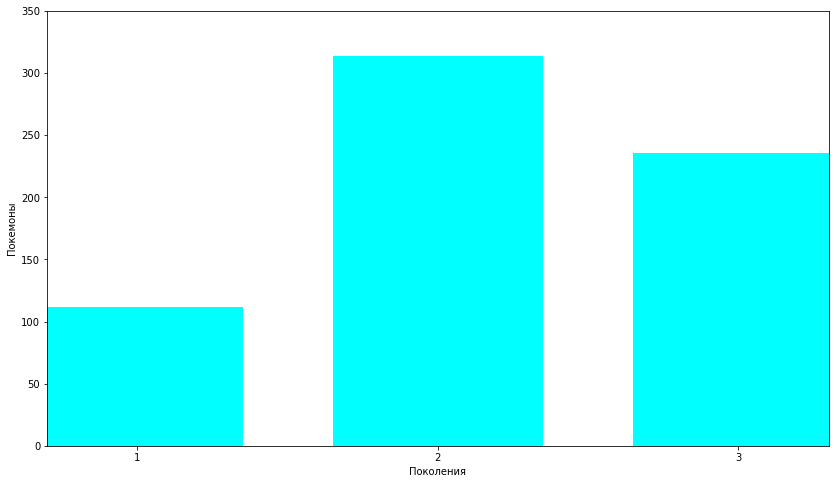

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
name = list(map(str, pd.read_csv('pokemon.csv', usecols=['name'], squeeze=False).values))
parent = list(map(str, pd.read_csv('pokemon.csv', usecols=['evolution_parent_pokemon_id'], squeeze=False).values))

for i in range(len(parent) - 1):
    if parent[0] == parent[i + 1]:
        parent[i + 1] = 0
    elif len(parent[i + 1]) == 5:
        parent[i + 1] = int(parent[i + 1][2])
    elif len(parent[i + 1]) == 6:
        parent[i + 1] = int(parent[i + 1][2] + parent[i + 1][3])
    else:
        parent[i + 1] = int(parent[i + 1][2] + parent[i + 1][3] + parent[i + 1][4])


parent[0] = 0


for i in range(len(name)):
    namecor = ''
    for j in range(len(name[i]) - 4):
        namecor += name[i][j + 2]
    name[i] = namecor



def deepsearchup(iden):
    if parent[iden] != 0:
        deepsearchup(parent[iden] - 1)
    else:

        gen(1)
        deepsearchdown(iden, 1)



def gen(nmax):
    global nnmax
    nnmax = nmax
    return nnmax


def deepsearchdown(iden, n):
    n += 1

    flag = 0
    for i in range(len(parent)):
        if parent[i] == iden + 1:
            flag = 1
            gen(n)
            deepsearchdown(i, n)

genarr = []
for l in range(len(name)):

    target = name[l]
    target = target.title()
    # print(target)
    try:
        index = (name.index(target))
        # print(index, parent[index])
        global n
        deepsearchup(index)

        genarr.append(nnmax)
        #print('масс', genarr)
    except ValueError:
       1

plt.rcParams['figure.figsize'] = (14, 8)
ww= 0.7
plt.xlabel('Поколения')
plt.ylabel('Покемоны')
plt.bar([1,2,3], [genarr.count(1),genarr.count(2), genarr.count(3)],ww, color = 'Aqua' )
plt.axis([0.7, 3.3, 0, 350])
plt.xticks([1, 2, 3])
plt.show()